In [2]:
#import all libraries

# numpy and pandas help us load and manipulate data
import numpy as np
import pandas as pd

# matplotlib and seaborn are used to plot data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#checking for a linear relationship

from statsmodels.formula.api import ols

#sklearn has many machine learning algorithms
from sklearn.linear_model import LinearRegression

# this helps split data for modeling
from sklearn.model_selection import train_test_split

import scipy as sp
import statsmodels.stats.diagnostic as diag
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sms
import pysal as ps

import statsmodels.tsa.api as smt
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [31]:
#Load student Data
student1= pd.read_csv("student-mat.csv", sep=";",header=0);
student2= pd.read_csv("student-por.csv", sep=";",header=0);
students=pd.concat([student1,student2])

In [14]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [32]:
# Drop protected columns

students=students.drop(['school','sex','age','address',], axis=1)

In [33]:
# Inspect Data
students.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GT3,A,4,4,at_home,teacher,course,mother,2,2,...,4,3,4,1,1,3,6,5,6,6
1,GT3,T,1,1,at_home,other,course,father,1,2,...,5,3,3,1,1,3,4,5,5,6
2,LE3,T,1,1,at_home,other,other,mother,1,2,...,4,3,2,2,3,3,10,7,8,10
3,GT3,T,4,2,health,services,home,mother,1,3,...,3,2,2,1,1,5,2,15,14,15
4,GT3,T,3,3,other,other,home,father,1,2,...,4,3,2,1,2,5,4,6,10,10


In [34]:
# Create dummy variables for Family Size

df = pd.get_dummies(students, columns=['Pstatus','famsize','Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'schoolsup', 'nursery','higher','internet', 'romantic'])
df.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,...,False,True,False,True,False,True,True,False,True,False
1,1,1,1,2,0,5,3,3,1,1,...,True,False,True,False,False,True,False,True,True,False
2,1,1,1,2,3,4,3,2,2,3,...,False,True,False,True,False,True,False,True,True,False
3,4,2,1,3,0,3,2,2,1,1,...,True,False,False,True,False,True,False,True,False,True
4,3,3,1,2,0,4,3,2,1,2,...,True,False,False,True,False,True,True,False,True,False


In [35]:
# Look at highly correlated features

df.corr()[['G3']].sort_values(by='G3', ascending = False)

,G3
G3,1.000000
G2,0.910743
G1,0.809142
higher_yes,0.236578
Medu,0.201472
studytime,0.161629
Fedu,0.159796
reason_reputation,0.121303
internet_yes,0.107064
Fjob_teacher,0.101361


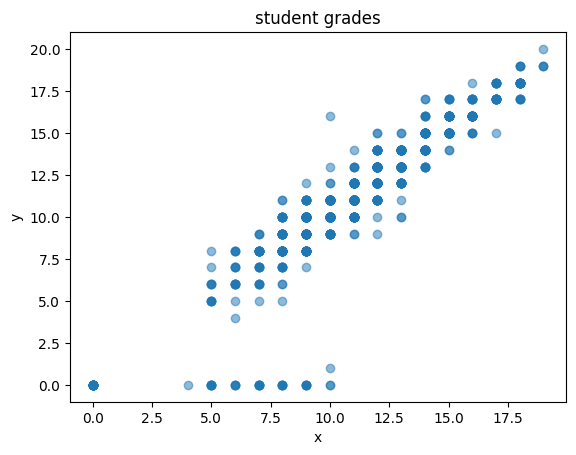

In [42]:
# Check Linearity - Section 2 Grades
X1 =df['G2']
y=df['G3']

#plot
plt.scatter(X1,y,alpha=0.5)
plt.title("student grades")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [43]:
# Partition features and response
X = df.iloc[:, : -1]
y = df['G3']

In [45]:
# Split into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [46]:
X.columns

Index(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Pstatus_A', 'Pstatus_T', 'famsize_GT3', 'famsize_LE3',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'schoolsup_no', 'schoolsup_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no'],
      dtype='object')

In [47]:
# Adding the constant term 
  
y = df.G3  # response
X = df.G2  # predictor
X = sms.add_constant(X)  # Adds a constant term to the predictor
X.head()  

,const,G2
0,1.0,6
1,1.0,5
2,1.0,8
3,1.0,14
4,1.0,10


In [48]:
est=sms.OLS(y, X)

In [49]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     5068.
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:26:58   Log-Likelihood:                -1969.0
No. Observations:                1044   AIC:                             3942.
Df Residuals:                    1042   BIC:                             3952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7079      0.176     -4.015      0.000      -1.054      -0.362
G2             1.0715      0.015     71.188      0.000       1.042       1.101
==============================================================================
Omnibus:                      714.254   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10032.938
Skew:                          -3.010   Prob(JB):                         0.00
Kurtosis:                      16.943   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# perform Durbin-Watson test

durbin_watson(est.resid)

1.8177022601944446

In [51]:
# Breusch-Pagan - Check for Multicolinearity
names = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Pstatus_A', 'Pstatus_T', 'famsize_GT3', 'famsize_LE3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'schoolsup_no', 'schoolsup_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
test = diag.het_breuschpagan(est.resid, est.model.exog)

lzip(names, test)


[('Medu', 34.90171352899825),
 ('Fedu', 3.467755457213383e-09),
 ('traveltime', 36.039686108674466),
 ('studytime', 2.6663341898564284e-09)]

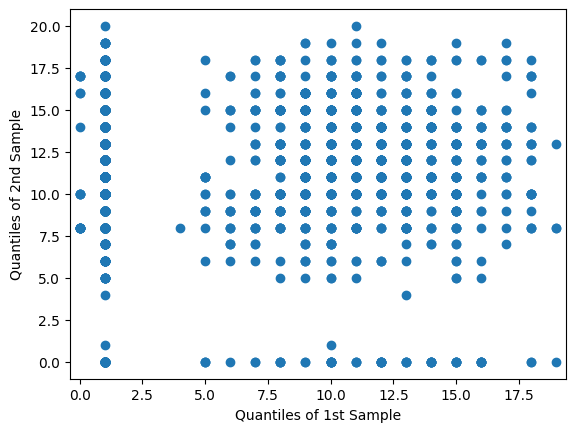

In [52]:
# Create QQ plot

from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sms.ProbPlot(X)
pp_y = sms.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
plt.show()

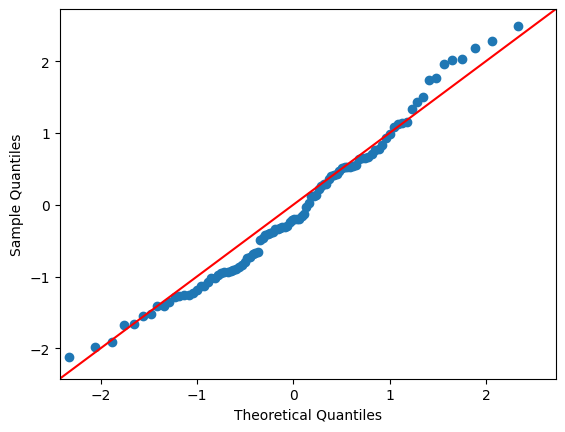

In [53]:
# Random data points generated 
data_points = np.random.normal(0, 1, 100)     
  
# Plot new QQ
sms.qqplot(data_points, line ='45') 
plt.show() 